# generative model of PGs 

In [2]:
from brian2 import *
%matplotlib inline
from brian2 import SpikeGeneratorGroup
import numpy as np

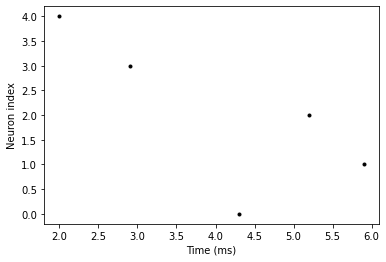

In [2]:
N = 5
tau = 10*ms
eqs = '''dv/dt = (2-v)/tau : 1 (unless refractory)'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v = 0', refractory=100*ms, method='exact') # N neurones, dont le potentiel de membrane évolue selon eqs, émet un spike quand v>1 et retrouve son potentiel de memb à 0 après ça, puis periode refractaire giga longue pour émission de 
G.v = 'rand()'

S = SpikeMonitor(G) # on enrgistre dans la variable t le moment où les spikes ont été émit et dans la variables i l'adresse du neurone qui l'a émit 

run(100*ms)

plot(S.t/ms, S.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');


In [38]:
n_PGs = 10
duration = 1000*ms
PGs = {}
N = 5
tau = 10*ms
eqs = '''dv/dt = (2-v)/tau : 1 (unless refractory)'''

for nb in range(n_PGs) : 
    G = NeuronGroup(N, eqs, threshold='v>1', reset='v = 0', refractory=duration, method='exact') # N neurones, dont le potentiel de membrane évolue selon eqs, émet un spike quand v>1 et retrouve son potentiel de memb à 0 après ça, puis periode refractaire giga longue pour émission de 
    G.v = 'rand()'
    
    S = SpikeMonitor(G) # on enrgistre dans la variable t le moment où les spikes ont été émit et dans la variables i l'adresse du neurone qui l'a émit 
    
    run(duration)
    
    t = (S.t/ms)
    PGs[nb]= t

    # à améliorer : tous les neurones spikent, on pourrait faire des PGs n'impliquantt que quelques neurones 
    # à faire : une liste et un plot avec tous les PGs collés (les uns à la suite des autres et mélangés répétés et tout) et un autre avec le moment d'occcurrence du PG et son identité (donc à la fin je dirais) -> se referer à l'article de cossine 

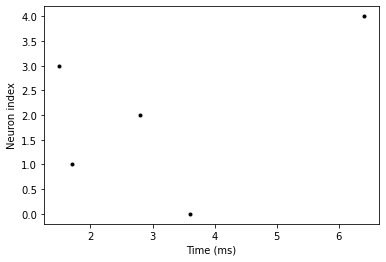

In [43]:
plot(PGs[5], S.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');

In [44]:
for nb in range(n_PGs) : 
    touslesPGscollés = []
    touslesPGscollés.append(PGs[nb])
print(touslesPGscollés)    

[array([0.8, 4.5, 4.6, 6.6, 6.6])]


In [42]:
print(touslesPGscollés)

[array([0.8, 4.5, 4.6, 6.6, 6.6])]


In [ ]:
for i in range(1, 4): 
    List.append(i) 
print("\nListe après l'ajout d'éléments de 1-3: ") 
print(List) 

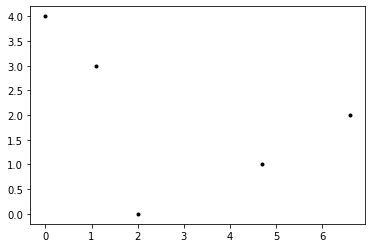

In [27]:
plot(PGs[5], S.i, '.k')
